# Bearbeitung des Datensatzes housing nach dem Buch "Praxiseinstieg Machine Learning" von Aurélion Géron

In [12]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit 

In [2]:
housing = pd.read_csv("Data/housing.csv")

## Übersicht über die Daten bekommen

In [3]:
# Eine Übersicht zum Datensatz bekommen:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Mit der Methode .info() eine Beschreibung der Daten erhalten

housing.info()
# 1. Spalte: die verschiedenen Spalten/Attribute des Datensatzes
# 2. Spalte: Anzahl der Zeilen zu jeder Spalte/Attribut --> total_bedrooms besitzt nur 20433 Zeilen, während alle anderen 20640 Zeilen besitzen
# 3. Spalte: Anzahl der Werte ungleich 0
# 4. Spalte: Um was für einen Datentyp es sich handelt; float64 = numerisch, object = hier Text, kann sonst ein beliebiges Objekt sein

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Nähere Betrachtung des Attributs "ocean_proximity"
# Hier handelt es sich um ein kategorisches Merkmal
# mit der Methode .value_counts() kann man herausfinden, welche Kategorien es gibt und die Anzahl pro Kategorie
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# Beschreibung der numerischen Attribute/Spalten/Merkmale
housing.describe()
# 25%, 50% und 75%: Angabe der Percentile
# 25% = 25. Percentil = 1. Quartil --> 25 % aller Zeilen liegen unter diesem Wert
# 50% = Median --> 50 % aller Zeilen liegen unter diesem Wert
# 75% = 75. Percentil = 3. Quartil --> --> 75 % aller Zeilen liegen unter diesem Wert

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


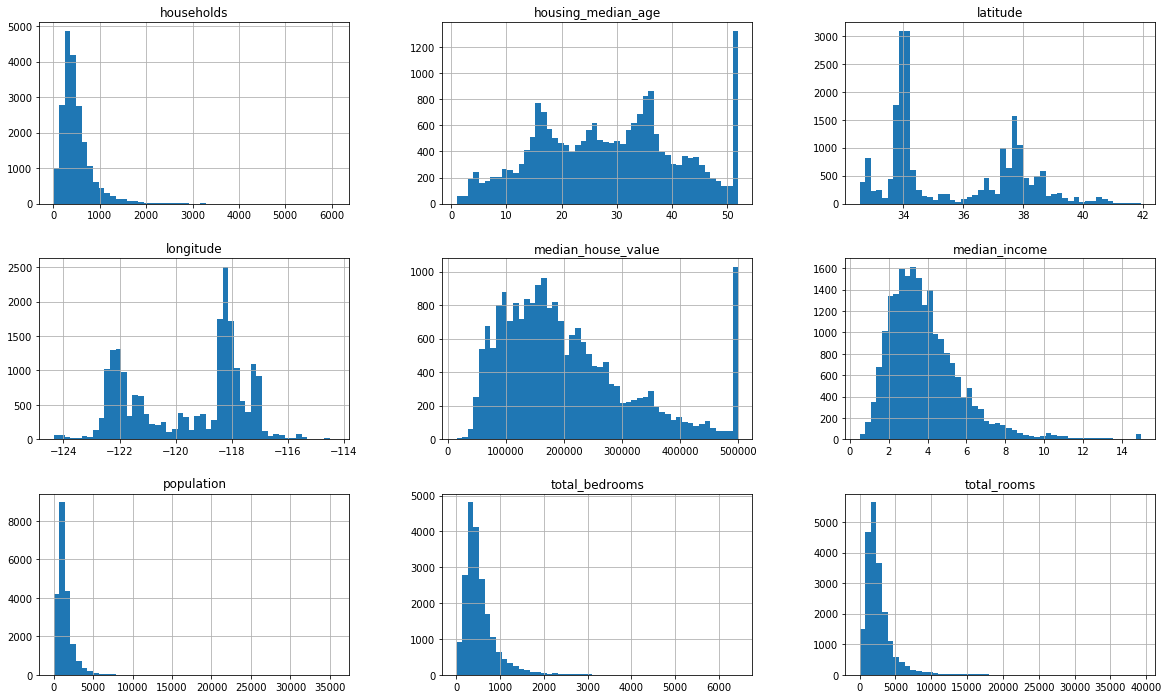

In [7]:
# Grafische Darstellung der Daten mit einem Histogramm
%matplotlib inline 
# Jupyter wird als backend verwendet. Was bedeutet das?
housing.hist(bins = 50, figsize=(20,12))
plt.show()#
# median_income: skaliert und beschnitte für Einkommen >= 15 und <= 0.5
# housing_median_age und median_house_value wurde auch gekappt/beschnitten
# Beschneidung von median_house_value ein Problem, da Algorithmus lernen könnte, dass es keine wertvolleren Häuser als 500.000 gibt
# viele Histogramme sind rechtsschief, erstrecken weiter nach rechts vom Median als nach links. Hierdurch wird das Erkennen von Mustern für einige ML-Algrorithmen schwieriger


## Aufteilen der Daten in Trainingsdaten und Testdaten
#### Daten werden jetzt schon aufgeteilt, bevor man sie genauer analysiert und visualisiert, um Data Snooping Bias zu verhindern
#### Data Snooping Bias ist, wenn das Gehirn Muster erkennt und dadurch die Daten overfitted werden

In [8]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

#### Stratifizieren der Gesamtdaten und anschließend der Trainings- und Testdaten, um sicher zu gehen, dass die Testdaten eine repräsentative Stichprobe der Trainingsdaten sind und kein bias vorliegt.

In [19]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace = True)
test_set_random = test_set.copy()
test_set_random["income_cat"] = np.ceil(housing["median_income"]/1.5)
test_set_random["income_cat"].where(test_set_random["income_cat"]<5, 5.0, inplace = True)

In [20]:
stratsplit = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in stratsplit.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
# Verteilung des Einkommens auf die verschiedenen Kategorien für den gesamten Datensatz
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [22]:
# Verteilung des Einkommens auf die verschiedenen Kategorien für den Testdatensatz
# --> prozentual sehr ähliche Aufteilung
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [23]:
test_set_random["income_cat"].value_counts()/len(test_set_random)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [36]:
# Vergleich der Aufteilung für alle Daten, random Test und stratifizierter Test
overview_strat_random = pd.DataFrame()
overview_strat_random["overall"] = housing["income_cat"].value_counts()/len(housing)
overview_strat_random["random"] = test_set_random["income_cat"].value_counts()/len(test_set_random)
overview_strat_random["strat test"] = strat_test_set["income_cat"].value_counts()/len(strat_test_set)
overview_strat_random["error random % "] = (overview_strat_random["random"] - overview_strat_random["overall"]) / overview_strat_random["overall"]*100
overview_strat_random["error strat % "] = (overview_strat_random["strat test"] - overview_strat_random["overall"]) / overview_strat_random["overall"]*100
overview_strat_random

,overall,random,strat test,error random %,error strat %
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309


## Erkunden und Visualisieren der Daten
#### Nur Trainingsdatensatz erkunden, um Data Snoopin Bias zu vermeiden

In [ ]:
# Erstellung einer Kopie vom train set, damit dieser intakt bleibt
housing_train = train_set.copy()

### Visualisieren geografischer Daten

In [ ]:
housing_train.plot(kind = "scatter", x = "longitude", y = "latitude", figsize=(10,7)) 

In [ ]:
# Um die Gebiete mit hoher Dichte besser darzustellen, wird das argument alpha = 0.1 gesetzt
housing_train.plot(kind = "scatter", x = "longitude", y = "latitude", figsize=(10,7), alpha = 0.1) 

In [ ]:
# Radius eines Kreises = Bevölkerung eines Bezirks (Option s)
# Farbe stellt den median_house_value dar (Option c)
# vordefinierte Farbskala ist Option cmap mit Namen jet: niedrige Werte in blau, hohe Werte in rot
housing_train.plot(kind = "scatter", x = "longitude", y = "latitude", figsize=(10,7), alpha = 0.4, s = housing_train["population"]/100, label = "population", c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

# Man erkennt, dass Häuser an der Küste um Gebiete mit hoher Dichte wie San Francisco, Los Angeles und San Diego sehr wertvoll sind
# Man könnte diese wertvollen Häuser mit einem Clustering-Algorithmus identifizieren und einige neue Merkmale mit der Entfernung
# zu den Cluster-Mittelpunkten hinzufügen --> nicht sicher, was das bedeutet

### Suche nach Korrelationen

In [ ]:
corr_matrix = housing_train.corr()

In [ ]:
# Wie stark jedes Merkmal mit median_house_value korreliert:
# Korrelationskoeffizient liegt zwischen -1 und 1.
# +1: positive Korrelation, Bsp.: je höher der median_income, desto höher median_house_value --> wohlhabende Leute kaufen teure Häuser
# -1: negative Korrelation: Bsp.: je höher latitude, desto niedriger median_house_value --> Häuser im Norden haben einen geringeren Wert
# 0: es gibt keine Korrelation
# Korrelationskoeffizient gilt nur für lineare Zusammenhänge, siehe S.56 für nicht-lineare Zusammenhänge
corr_matrix["median_house_value"].sort_values(ascending = False)

In [ ]:
 # Visuelle Darstellung der wichtigsten Korrelationen:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]
print(scatter_matrix(housing_train[attributes],figsize=(20,12)))

# linearer Zusammenhang ist am deutlichsten mit median_income zu erkennen
# linearer Zusammenhang ist in der corr_matrix leichter ablesbar

In [ ]:
# median_income zeigt höchste Korrelation
# genauere Betrachtung zwischen dem Verhältnis von median_income zu median_house_value
housing_train.plot(kind = "scatter", x="median_income",y="median_house_value",alpha=0.1, figsize=(20,12))
#obere Begrezung bei 500.000 € für median_house_value
#mehrere horizontale Linien bei 450.000 $, 350.000 $, 280.000 $, 220.000 $, 190.000 $, und weitere
# dies sind möglicherweise Artefakte und sollten entfernt werden, damit Algorithmus nicht versucht diese darzustellen

## Feature Engineering
### neue, aussagekräftigere Attribute durch Kombination von Attributen hinzufügen

In [ ]:
housing_train["rooms_per_household"] = housing_train["total_rooms"]/housing_train["households"]
housing_train["bedrooms_per_room"] = housing_train["total_bedrooms"]/housing_train["total_rooms"]
housing_train["population_per_household"] = housing_train["population"]/housing_train["households"]
housing_train["rooms_per_family_member"] = housing_train["rooms_per_household"]/housing_train["population_per_household"]
housing_train["bedrooms_per_family_member"] = housing_train["bedrooms_per_room"]/housing_train["population_per_household"]

In [ ]:
corr_matrix = housing_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# Attribute "rooms_per_family_member" und "bedrooms_per_room" korrelieren stärker als Ausgangsattribute, außer median_income

## Daten für Machine-Learning-Algorithmen vorbereiten